In [1]:
#Librerias a usar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#📌 Extracción

In [2]:
# Importo los datos Json y asigno variable
datosTelecomX = pd.read_json('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
datosTelecomX

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


Reviso la informacion, tambien me encargo de revisarla en la pagina Json viewer y confirmo la estructura de los datos.

In [3]:
# Normalizo los datos para cada subestructura ya que este archivo Json tiene una estructura anidada por secciones
df_customerTelecomX = pd.json_normalize(datosTelecomX['customer'])
df_phoneTelecomX = pd.json_normalize(datosTelecomX['phone'])
df_internetTelecomX = pd.json_normalize(datosTelecomX['internet'])
df_accountTelecomX = pd.json_normalize(datosTelecomX['account'])

Ya con los datos normalizados, los uno en un solo dataframe

In [4]:
telecomXdata = pd.concat([
    datosTelecomX[['customerID', 'Churn']],
    df_customerTelecomX,
    df_phoneTelecomX,
    df_internetTelecomX,
    df_accountTelecomX
    ], axis=1)

telecomXdata #reviso el dataframe completo con los datos normalizados

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

Despues de cargado los datos, en esta etapa me aseguro de revisar los tipos de datos de cada columna y la informacion que contiene el dataframe creado.

In [5]:
telecomXdata.info() # Aqui reviso si hay informacion faltante (null), el nombre de cada columna y el tipo de dato que contienen.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Estandarizo los nombres de las columnas. Reemplazo los espacios vacíos por guiones bajos (_), elimino espacios al inicio o final y convierto todos los nombres a minúsculas.

In [6]:
telecomXdata.columns = telecomXdata.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '_') #se realizan los cambios

Segun la informacion del dataframe al parecer no hay datos faltantes, pero hay tipo de datos incorrectos, procedemos a corregir cada uno a su formato correcto.

hay 4 columnas que no se formatearan:

- La columna 'customerid' ya que esta correcta como object (texto)

- La columna 'seniorcitizen' es una variable binaria, ya esta normalizada 0(no es adulto mayor) 1 (si es adulto mayor) ya esta en formato int64

- La columna 'tenure' ya esta en formato int64

- La columna 'charges_monthly' ya esta en formato int64

Tambien reviso cuantos y valores unicos estan presentes en cada columna

In [7]:
telecomXdata.nunique()

,0
customerid,7267
churn,3
gender,2
seniorcitizen,2
partner,2
dependents,2
tenure,73
phoneservice,2
multiplelines,3
internetservice,3


Analizo las columnas no numéricas para identificar cuáles son sus valores únicos, poniendo especial atención en aquellas que tienen más de dos valores distintos. Las columnas numéricas se excluyen de este análisis, salvo que representen variables categóricas.

In [8]:
cols = ['churn', 'gender', 'partner', 'dependents', 'phoneservice',
        'multiplelines', 'internetservice', 'onlinesecurity',
        'onlinebackup', 'deviceprotection', 'techsupport',
        'streamingtv', 'streamingmovies', 'contract',
        'paperlessbilling', 'paymentmethod']

for col in cols:
    print(f"{col}: {telecomXdata[col].unique()}")

churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['Yes' 'No']
phoneservice: ['Yes' 'No']
multiplelines: ['No' 'Yes' 'No phone service']
internetservice: ['DSL' 'Fiber optic' 'No']
onlinesecurity: ['No' 'Yes' 'No internet service']
onlinebackup: ['Yes' 'No' 'No internet service']
deviceprotection: ['No' 'Yes' 'No internet service']
techsupport: ['Yes' 'No' 'No internet service']
streamingtv: ['Yes' 'No' 'No internet service']
streamingmovies: ['No' 'Yes' 'No internet service']
contract: ['One year' 'Month-to-month' 'Two year']
paperlessbilling: ['Yes' 'No']
paymentmethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']


Con los resultados obtenidos, es posible identificar qué columnas deben ser formateadas y normalizadas según sus valores internos. Esto permite distinguir entre variables binarias y categóricas, y detectar posibles inconsistencias.

A partir de lo anterior, se puede confirmar que, si una columna tiene más de dos valores únicos, no necesariamente representa un error, sino que puede formar parte de la lógica del negocio y del sistema. Sin embargo, por razones de limpieza y claridad, se reemplazará el valor 'No internet service' por 'No' en las columnas (onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, streamingmovies) ya que en términos funcionales este valor indica que no se cuenta con servicio de internet y, por tanto, no aplican los servicios adicionales relacionados.

Además, se detectó que la columna Churn contiene un tercer valor: un espacio vacío (' '), lo cual sí representa un dato faltante o inconsistente, y será corregido.


seran categoricas las siguientes columnas:

- gender
- multiplelines
- internetservice
- contract
- paymentmethod


seran binarios los siguientes columnas, ya que sus valores son 'yes' y 'no:

- churn
- partner
- dependents
- phone service
- onlinesecurity
- onlinebackup
- deviceprotection
- techsupport
- streamingtv
- streamingmovies
- paperlessbilling



In [9]:
# Hago cambios para columnas categoricas
tipoCat = ['gender', 'multiplelines', 'internetservice', 'contract', 'paymentmethod']

# Limpieza primero
for col in tipoCat:
    telecomXdata[col] = telecomXdata[col].astype(str).str.strip().str.lower()

# Luego, conversión a categoría
for col in tipoCat:
    telecomXdata[col] = telecomXdata[col].astype('category')

Continuo reemplazando los valores 'No internet service' por 'No'

In [10]:
# reemplazo no internet service por No
noService = ['onlinesecurity',
             'onlinebackup',
             'deviceprotection',
             'techsupport',
             'streamingtv',
             'streamingmovies'
             ]

for col in noService:
    telecomXdata.loc[:, col] = telecomXdata[col].replace('No internet service', 'No')

Corrijo la columna 'Churn' ya que tiene valores vacios ' '

In [11]:
(telecomXdata['churn'] == '').sum() #confirmo cuantos hay vacios ''

np.int64(224)

En este caso, se identificaron 224 registros con valores vacíos en la columna Churn. Dado que este análisis se centra en la evasión de clientes, y dicha variable es fundamental para el estudio, se toma la decisión de eliminar estos registros. Los valores vacíos no pueden clasificarse ni analizarse de forma adecuada, por lo tanto, mantenerlos afectaría la calidad del análisis.

Además, estos registros representan únicamente el 3.2% del total del dataset (224 de 7267), por lo que su eliminación no impacta de forma significativa la representatividad de los datos.

In [12]:
# Eliminacion de registros vacios
telecomXdata = telecomXdata[telecomXdata['churn'] != ''].copy()

Ya No tenemos ningun valor vacio en la columna Churn y estos registros se eliminaron correctamente de nuestro dataframe.

ahora nos apareceran tambien 2 registros unicos en la columna Churn

In [13]:
# Reinicio indice
telecomXdata.reset_index(drop=True, inplace=True)

In [14]:
telecomXdata

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total
0,0002-ORFBO,No,female,0,Yes,Yes,9,Yes,no,dsl,...,Yes,No,Yes,Yes,No,one year,Yes,mailed check,65.60,593.3
1,0003-MKNFE,No,male,0,No,No,9,Yes,yes,dsl,...,No,No,No,No,Yes,month-to-month,No,mailed check,59.90,542.4
2,0004-TLHLJ,Yes,male,0,No,No,4,Yes,no,fiber optic,...,No,Yes,No,No,No,month-to-month,Yes,electronic check,73.90,280.85
3,0011-IGKFF,Yes,male,1,Yes,No,13,Yes,no,fiber optic,...,Yes,Yes,No,Yes,Yes,month-to-month,Yes,electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,female,1,Yes,No,3,Yes,no,fiber optic,...,No,No,Yes,Yes,No,month-to-month,Yes,mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,female,0,No,No,13,Yes,no,dsl,...,No,No,Yes,No,No,one year,No,mailed check,55.15,742.9
7039,9992-RRAMN,Yes,male,0,Yes,No,22,Yes,yes,fiber optic,...,No,No,No,No,Yes,month-to-month,Yes,electronic check,85.10,1873.7
7040,9992-UJOEL,No,male,0,No,No,2,Yes,no,dsl,...,Yes,No,No,No,No,month-to-month,Yes,mailed check,50.30,92.75
7041,9993-LHIEB,No,male,0,Yes,Yes,67,Yes,no,dsl,...,No,Yes,Yes,No,Yes,two year,No,mailed check,67.85,4627.65


se revisa y se confirma antes de convertir SI EN ESTAS COLUMNAS HAY ALGUN NAN O un valor diferente a Yes o No, no hay valores nan, faltantes o vacios

Codifico los valores 'Yes' y 'No' como 1 y 0 en las columnas binarias identificadas previamente.

en donde 1 = si y 0 = No

Primero hago limpieza en los datos, me aseguro que este en minuscula y sin espacios

In [15]:
colBinarias = ['churn', 'partner', 'dependents', 'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']

for col in colBinarias:
    telecomXdata.loc[:, col] = (
        telecomXdata[col]
        .astype(str)        # Convertir a string (para evitar errores si hay NaN o booleanos)
        .str.strip()        # Elimina espacios al inicio/final
        .str.lower()        # Convierte todo a minúsculas
    )

In [16]:
#hago comprobaciones antes de pasarlos a binario y int64
for col in colBinarias:
    print(f"{col}: {telecomXdata[col].unique()}")

churn: ['no' 'yes']
partner: ['yes' 'no']
dependents: ['yes' 'no']
phoneservice: ['yes' 'no']
onlinesecurity: ['no' 'yes']
onlinebackup: ['yes' 'no']
deviceprotection: ['no' 'yes']
techsupport: ['yes' 'no']
streamingtv: ['yes' 'no']
streamingmovies: ['no' 'yes']
paperlessbilling: ['yes' 'no']


In [17]:
colBinarias = ['churn', 'partner', 'dependents', 'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'paperlessbilling']

for col in colBinarias:
    telecomXdata[col] = telecomXdata[col].map({'yes': 1, 'no': 0}).astype('Int64') #automaticamente se asignaron tipo de dato int64

In [18]:
print(telecomXdata.dtypes) #se confirma que se aplicaran cambios al dataframe

customerid            object
churn                  Int64
gender              category
seniorcitizen          int64
partner                Int64
dependents             Int64
tenure                 int64
phoneservice           Int64
multiplelines       category
internetservice     category
onlinesecurity         Int64
onlinebackup           Int64
deviceprotection       Int64
techsupport            Int64
streamingtv            Int64
streamingmovies        Int64
contract            category
paperlessbilling       Int64
paymentmethod       category
charges_monthly      float64
charges_total         object
dtype: object


revisando queda un solo cambio de tipo de dato para charges.total ya que es el unico float64 a convertir. En este caso nos aparece el siguiente error: could not convert string to float: ' ', ya que hay espacios vacios

procedo a hacer limpieza correspondiente, quitando espacios, elimando simbolos, digitos, caracateres y demas, reviso verificando la suma de los ' ' y los Nan, el resultado nos indica que hay 11 espacios vacios, tambien nos aseguramos que no hay (Nan) existentes.

In [19]:
telecomXdata.loc[:, 'charges_total'] = telecomXdata['charges_total'].astype(str).str.strip() #todo en string y sin espacios
telecomXdata.loc[:, 'charges_total'] = telecomXdata['charges_total'].str.replace(r'\s+', '', regex=True)
telecomXdata.loc[:, 'charges_total'] = telecomXdata['charges_total'].str.replace(',', '.', regex=False)  #reemplazo comas por puntos
telecomXdata.loc[~telecomXdata['charges_total'].str.match(r'^-?\d+(\.\d+)?$', na=False), 'charges_total'] = np.nan

In [20]:
#Convertimos a float64
telecomXdata['charges_total'] = telecomXdata['charges_total'].astype('float64')

Se confirma el tipo de dato y la inexistencia de nan

In [21]:
print(telecomXdata['charges_total'].dtype)  # Debería ser float64
print("NaNs encontrados:", telecomXdata['charges_total'].isna().sum())

float64
NaNs encontrados: 11


Ahora tenemos 11 Nan, Hasta aqui, ya se han corregido los tipo de Datos, pero hay inconsistencias en solo 11 datos Nan en la columna 'charges_Total', ya que son 11 datos faltantes solamente puedo reemplazarlos por valores reales ya que el valor total es la multiplicacion entre el valor mensual (monthly) que estan presentes y sin errores en el dataframe y el numero de meses de permanencia (tenure)

In [22]:
dataNanTelX = telecomXdata['charges_total'].isna()
# Solo actualiza donde hay valores faltantes Nan
telecomXdata.loc[dataNanTelX, 'charges_total'] = (
    telecomXdata.loc[dataNanTelX, 'charges_monthly'] * telecomXdata.loc[dataNanTelX, 'tenure']
)

In [23]:
print(telecomXdata['charges_total'].dtype)
print("NaNs encontrados:", telecomXdata['charges_total'].isna().sum()) #confirmamos de nuevo

float64
NaNs encontrados: 0


Verificamos que los valores se hayan reemplazado correctamente revisando si aún existen datos NaN. Como no se encontraron valores faltantes, podemos confirmar que fueron actualizados exitosamente.

Para el manejo de inconsistencias reviso de nuevo algunas columnas, usando el script Unique,En la columna 'contract' se encuentra el valor 'Month-to-month', el cual corrijo para lograr una mayor consistencia visual.

In [24]:
#convierto a string
telecomXdata.loc[:, 'contract'] = telecomXdata['contract'].astype(str)

# se limpian espacios y reemplaza guiones
telecomXdata.loc[:, 'contract'] = telecomXdata['contract'].str.strip().str.replace('-', ' ', regex=False)

# Convierto 'nan' como string a np.nan real
telecomXdata.loc[:, 'contract'] = telecomXdata['contract'].replace('nan', np.nan)

# se vuelve a convertir en categoría
telecomXdata['contract'] = telecomXdata['contract'].astype('category')

# se Verifica
print(telecomXdata['contract'].dtype)


category


/tmp/ipython-input-24-4180829788.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['one year' 'month to month' 'month to month' ... 'month to month'
 'two year' 'two year']' has dtype incompatible with category, please explicitly cast to a compatible dtype first.
  telecomXdata.loc[:, 'contract'] = telecomXdata['contract'].str.strip().str.replace('-', ' ', regex=False)


Se revisa y se confirman los cambios, sin simbolos.

In [25]:
print(telecomXdata['contract'].unique())

['one year', 'month to month', 'two year']
Categories (3, object): ['month to month', 'one year', 'two year']


Creo columna de cuentas diarias

In [26]:
telecomXdata.loc[:, 'daily_accounts'] = (telecomXdata['charges_monthly'] / 30).round(2)

In [27]:
telecomXdata

,customerid,churn,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,charges_monthly,charges_total,daily_accounts
0,0002-ORFBO,0,female,0,1,1,9,1,no,dsl,...,0,1,1,0,one year,1,mailed check,65.60,593.30,2.19
1,0003-MKNFE,0,male,0,0,0,9,1,yes,dsl,...,0,0,0,1,month to month,0,mailed check,59.90,542.40,2.00
2,0004-TLHLJ,1,male,0,0,0,4,1,no,fiber optic,...,1,0,0,0,month to month,1,electronic check,73.90,280.85,2.46
3,0011-IGKFF,1,male,1,1,0,13,1,no,fiber optic,...,1,0,1,1,month to month,1,electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,1,female,1,1,0,3,1,no,fiber optic,...,0,1,1,0,month to month,1,mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,female,0,0,0,13,1,no,dsl,...,0,1,0,0,one year,0,mailed check,55.15,742.90,1.84
7039,9992-RRAMN,1,male,0,1,0,22,1,yes,fiber optic,...,0,0,0,1,month to month,1,electronic check,85.10,1873.70,2.84
7040,9992-UJOEL,0,male,0,0,0,2,1,no,dsl,...,0,0,0,0,month to month,1,mailed check,50.30,92.75,1.68
7041,9993-LHIEB,0,male,0,1,1,67,1,no,dsl,...,1,1,0,1,two year,0,mailed check,67.85,4627.65,2.26


In [28]:
telecomXdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerid        7043 non-null   object  
 1   churn             7043 non-null   Int64   
 2   gender            7043 non-null   category
 3   seniorcitizen     7043 non-null   int64   
 4   partner           7043 non-null   Int64   
 5   dependents        7043 non-null   Int64   
 6   tenure            7043 non-null   int64   
 7   phoneservice      7043 non-null   Int64   
 8   multiplelines     7043 non-null   category
 9   internetservice   7043 non-null   category
 10  onlinesecurity    7043 non-null   Int64   
 11  onlinebackup      7043 non-null   Int64   
 12  deviceprotection  7043 non-null   Int64   
 13  techsupport       7043 non-null   Int64   
 14  streamingtv       7043 non-null   Int64   
 15  streamingmovies   7043 non-null   Int64   
 16  contract          7043 n

In [29]:
telecomXdata.to_csv('telecomXdata_limpio.csv', index=False) #descargo nuevo dataframe limpio

#📊 Carga y análisis

Analisis descriptivo de columnas numericas diferentes a las propuestas binarias

In [30]:
telecomXdata[['tenure', 'charges_monthly', 'charges_total', 'daily_accounts']].describe()

,tenure,charges_monthly,charges_total,daily_accounts
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304,2.158675
std,24.559481,30.090047,2266.794470,1.003088
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.500000,398.550000,1.180000
50%,29.000000,70.350000,1394.550000,2.340000
75%,55.000000,89.850000,3786.600000,2.990000
max,72.000000,118.750000,8684.800000,3.960000


Distribución de evasión

In [31]:
print(telecomXdata['churn'].value_counts())

churn
0    5174
1    1869
Name: count, dtype: Int64


In [32]:
# Porcentaje
print(telecomXdata['churn'].value_counts(normalize=True) * 100)

churn
0    73.463013
1    26.536987
Name: proportion, dtype: Float64


Nota: En esta variable, 1 = Sí (el cliente se dio de baja) y 0 = No (el cliente permaneció).

Podemos observar que la mayoría de los clientes no se dieron de baja (churn = 0), mientras que una menor proporción sí lo hizo (churn = 1). Esto indica que, aunque existe evasión, la mayor parte de los clientes aún permanece con la compañía.

Aproximadamente el 26.5% de los clientes se han dado de baja (churn = 1), mientras que el 73.5% permanecen (churn = 0). Esto indica que más de 1 de cada 4 clientes se va, lo cual puede representar una oportunidad importante de mejora en el servicio o en campañas de fidelizacion de clientes.

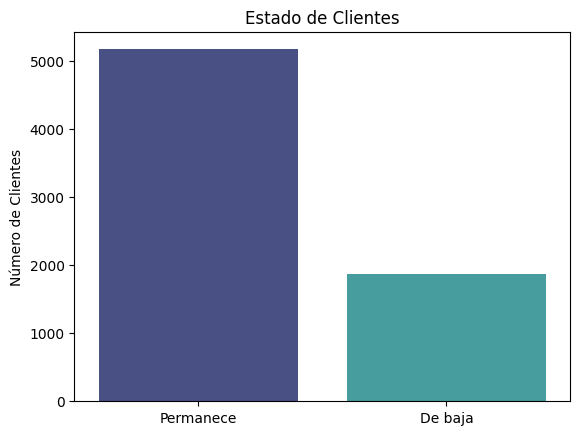

In [33]:
# Grafico resultados
churn_counts = telecomXdata['churn'].value_counts().sort_index()

df_churn = pd.DataFrame({
    'Estado': ['Permanece', 'De baja'],
    'Cantidad': [churn_counts[0], churn_counts[1]]
})

# Gráfico
sns.barplot(data=df_churn, x='Estado', y='Cantidad', hue='Estado', palette=sns.color_palette("mako", n_colors=2), legend=False)

plt.title('Estado de Clientes')
plt.xlabel('')
plt.ylabel('Número de Clientes')
plt.show()

Recuento de evasión por variables categóricas

Para este analisis, usare 5 variables categoricas las cuales son:

- paymentmethod    
- contract          
- internetservice   
- multiplelines     
- gender

usamos la funcion de pandas pd.crosstab() esta funcion nos permite cruzar una o mas variables categóricas para obtener una tabla de frecuencias resumida.

los valores que nos da la funcion pd.crosstab son proporciones y entrega el resultado en decimales y no en porcentaje, Para facilitar la lectura, almacenaré el resultado en una variable llamada tabla, y luego multiplicaré sus valores por 100 y los redondearé, obteniendo así porcentajes más comprensibles.

In [34]:
# Analisis de evasion por genero

table_gender = pd.crosstab(index=telecomXdata['gender'], columns=telecomXdata['churn'], normalize='index')
table_gender_percent = (table_gender * 100).round(2)
table_gender_percent

churn,0,1
gender,,
female,73.08,26.92
male,73.84,26.16


In [35]:
#analisis de evasion por tipo de contrato

table_contract = pd.crosstab(index=telecomXdata['contract'], columns=telecomXdata['churn'], normalize='index')
table_contract_percent = (table_contract * 100).round(2)
table_contract_percent

churn,0,1
contract,,
month to month,57.29,42.71
one year,88.73,11.27
two year,97.17,2.83


In [36]:
#analisis de evasion por metodo de pago

table_paymentmethod = pd.crosstab(index=telecomXdata['paymentmethod'], columns=telecomXdata['churn'], normalize='index')
table_paymentmethod_percent = (table_paymentmethod * 100).round(2)
table_paymentmethod_percent

churn,0,1
paymentmethod,,
bank transfer (automatic),83.29,16.71
credit card (automatic),84.76,15.24
electronic check,54.71,45.29
mailed check,80.89,19.11


In [37]:
#analisis de evasion por tipo de servicio de internet

table_internetservice = pd.crosstab(index=telecomXdata['internetservice'], columns=telecomXdata['churn'], normalize='index')
table_internetservice_percent = (table_internetservice * 100).round(2)
table_internetservice_percent

churn,0,1
internetservice,,
dsl,81.04,18.96
fiber optic,58.11,41.89
no,92.60,7.40


In [38]:
#analisis de evasion por tipo de lineas

table_multiplelines = pd.crosstab(index=telecomXdata['multiplelines'], columns=telecomXdata['churn'], normalize='index')
table_multiplelines_percent = (table_multiplelines * 100).round(2)
table_multiplelines_percent

churn,0,1
multiplelines,,
no,74.96,25.04
no phone service,75.07,24.93
yes,71.39,28.61


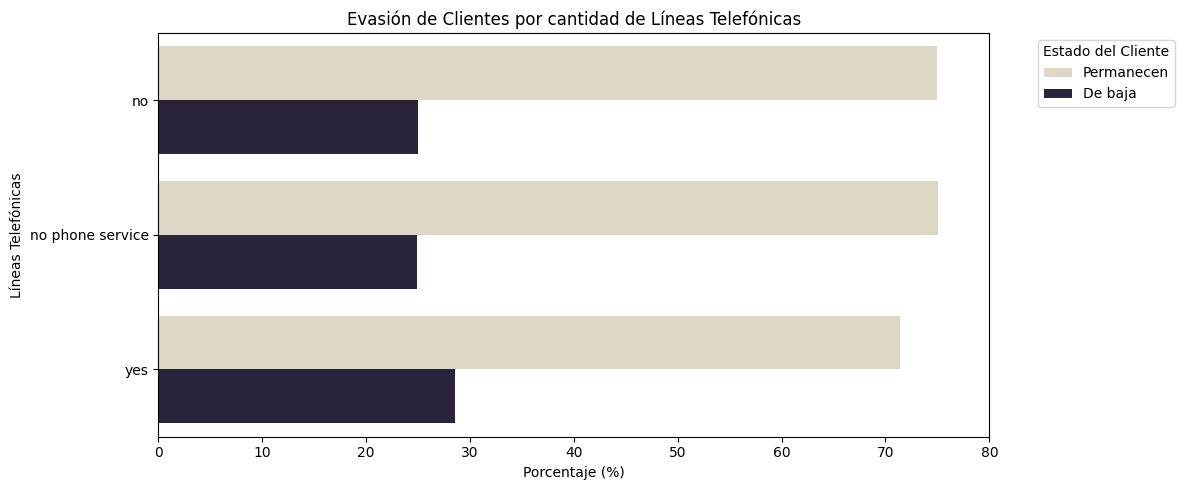

In [41]:
# Grafica por cantidad de lineas contratadas

df_lines = table_multiplelines_percent.reset_index().melt(
    id_vars='multiplelines', var_name='Estado', value_name='Porcentaje'
)

# Reemplazar valores para mostrar etiquetas legibles
df_lines['Estado'] = df_lines['Estado'].map({0: 'Permanecen', 1: 'De baja', 'No': 'Permanecen', 'Yes': 'De baja'})

# Paleta de colores (Blues)
colores = sns.color_palette("ch:s=-.2,r=.6", n_colors=2)

# Gráfico
plt.figure(figsize=(12, 5))
sns.barplot(data=df_lines,
            y='multiplelines',
            x='Porcentaje',
            hue='Estado',
            palette=colores)

# Títulos y etiquetas
plt.title('Evasión de Clientes por cantidad de Líneas Telefónicas')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Líneas Telefónicas')

# Limitar el eje X al 80%
plt.xlim(0, 80)

# Leyenda automática con colores
plt.legend(title='Estado del Cliente', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

La tasa de evasión para quienes tienen múltiples líneas (yes) es de 28.61%, ligeramente mayor que para quienes no tienen (25.04%) o no usan servicio telefónico (24.93%), esto indica una variacion poco marcada.

Aunque se consideraron inicialmente cinco variables categóricas, se descartaron paymentmethod, gender y multiplelines por no mostrar diferencias significativas en los patrones de evasión. El análisis se centró en contract y  internetservice, ya que estas presentaron variaciones más claras en la tasa de cancelación, lo cual puede ser útil para orientar estrategias de retención.

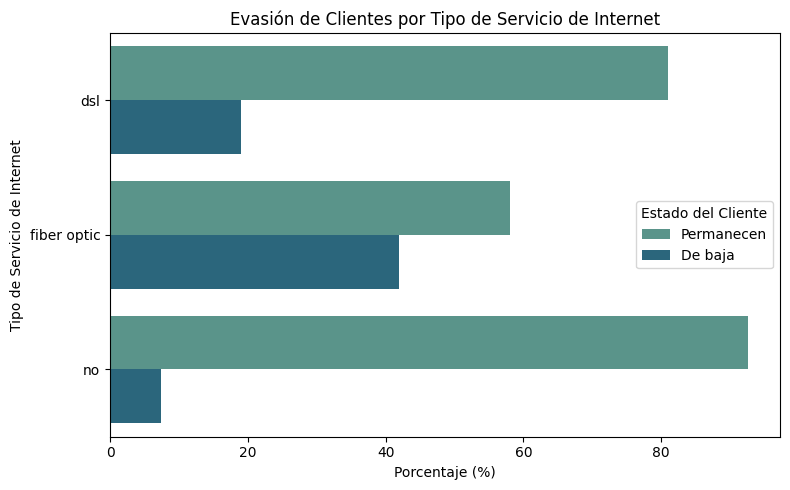

In [39]:
# Grafica por tipo de servicio de internet

# Reformatear los datos
df_plot = table_internetservice_percent.reset_index().melt(
    id_vars='internetservice', var_name='Estado', value_name='Porcentaje'
)

# Reemplazar valores para mostrar etiquetas legibles
df_plot['Estado'] = df_plot['Estado'].map({0: 'Permanecen', 1: 'De baja', 'No': 'Permanecen', 'Yes': 'De baja'})

# Paleta de colores
colores = sns.color_palette("crest", n_colors=2)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot,
            y='internetservice',
            x='Porcentaje',
            hue='Estado',
            palette=colores)

# Títulos
plt.title('Evasión de Clientes por Tipo de Servicio de Internet')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Tipo de Servicio de Internet')

# Leyenda (sin pasar labels manualmente)
plt.legend(title='Estado del Cliente')

plt.tight_layout()
plt.show()

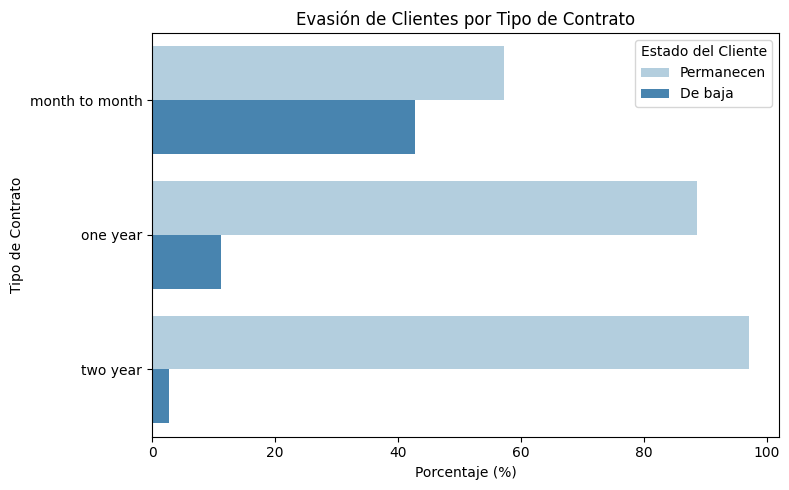

In [40]:
# Grafica por tipo de contrato

# Reformatear los datos
df_contract = table_contract_percent.reset_index().melt(
    id_vars='contract', var_name='Estado', value_name='Porcentaje'
)

# Reemplazar valores para mostrar etiquetas legibles
df_contract['Estado'] = df_contract['Estado'].map({0: 'Permanecen', 1: 'De baja', 'No': 'Permanecen', 'Yes': 'De baja'})

# Paleta de colores
colores = sns.color_palette("Blues", n_colors=2)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=df_contract,
            y='contract',
            x='Porcentaje',
            hue='Estado',
            palette=colores)

# Títulos
plt.title('Evasión de Clientes por Tipo de Contrato')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Tipo de Contrato')

# Leyenda
plt.legend(title='Estado del Cliente')

plt.tight_layout()
plt.show()

Conteo de evasión por variables numéricas

Para el análisis de variables numéricas, seleccioné aquellas que considero pueden aportar información relevante en el contexto del estudio sobre la evasión de clientes. Las variables elegidas son:

- seniorcitizen: Indica si el cliente es una persona mayor, lo cual puede influir en sus hábitos de consumo o en su decisión de mantener o cancelar el servicio.

- tenure: Representa el tiempo (en meses) que el cliente ha estado con la empresa. Es una variable clave para analizar la fidelidad del cliente.

- charges_monthly: Muestra el valor mensual que paga el cliente, útil para evaluar si el costo está relacionado con la evasión.

- dependents: Informa si el cliente tiene personas a su cargo. Esto podría influir en su decisión de cancelar o mantener el servicio.

- phoneservice: Indica si el cliente tiene contratado el servicio telefónico, lo cual puede relacionarse con el tipo de servicios que consume y su nivel de compromiso con la empresa.



In [42]:
#analisis para seniorcitizen

table_seniorcitizen = pd.crosstab(index=telecomXdata['seniorcitizen'], columns=telecomXdata['churn'], normalize='index')
table_seniorcitizen_percent = (table_seniorcitizen * 100).round(2)
table_seniorcitizen_percent

churn,0,1
seniorcitizen,,
0,76.39,23.61
1,58.32,41.68


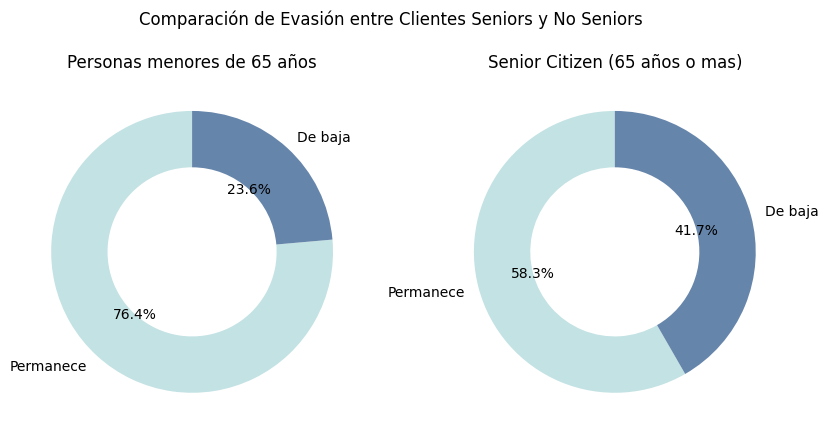

In [43]:
# Grafica analisis Para ciudadanos seniors y no seniors

labels = ['Permanece', 'De baja']
group_0 = [76.39, 23.61]  # No Senior
group_1 = [58.32, 41.68]  # Senior

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico 1: No Senior
ax[0].pie(group_0, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("ch:start=.2,rot=-.3",n_colors=3), wedgeprops=dict(width=0.4))
ax[0].set_title('Personas menores de 65 años')

# Gráfico 2: Senior
ax[1].pie(group_1, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("ch:start=.2,rot=-.3",n_colors=3), wedgeprops=dict(width=0.4))
ax[1].set_title('Senior Citizen (65 años o mas)')

plt.suptitle('Comparación de Evasión entre Clientes Seniors y No Seniors')
plt.show()

Se realizó una clasificación de los clientes en dos grupos: Jóvenes (menores de 65 años) y Mayores (65 años o más), basada en la variable seniorcitizen. Esta distinción permite observar diferencias de comportamiento en cuanto a la retención del servicio. Al analizar la tasa de cancelación (churn), se observa que los clientes mayores presentan una mayor probabilidad de abandonar el servicio (41.7%) en comparación con los jóvenes (23.6%). Esto puede deberse a factores como menor familiaridad con servicios digitales, menor uso de internet o mayor sensibilidad al precio.

In [44]:
# analisis para dependents

table_dependents = pd.crosstab(index=telecomXdata['dependents'], columns=telecomXdata['churn'], normalize='index')
table_dependents_percent = (table_dependents * 100).round(2)
table_dependents_percent


churn,0,1
dependents,,
0,68.72,31.28
1,84.55,15.45


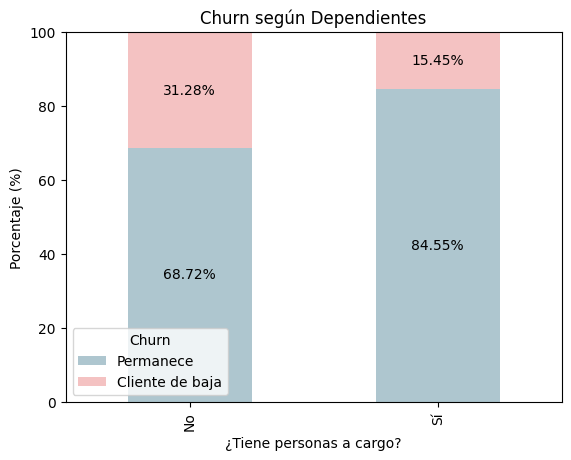

In [51]:
# Redefinimos para trabajar con la tabla creada anteriormente
table_dependents_percent.plot(kind='bar', stacked=True, color=['#aec6cf', '#f4c2c2'])

# Etiquetas
plt.title('Churn según Dependientes')
plt.xlabel('¿Tiene personas a cargo?')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Churn', labels=['Permanece', 'Cliente de baja'])

# Mostrar porcentajes sobre las barras
for idx, row in table_dependents_percent.iterrows():
    plt.text(idx, row[0]/2, f"{row[0]}%", ha='center', va='center', color='black')
    plt.text(idx, row[0] + row[1]/2, f"{row[1]}%", ha='center', va='center', color='black')

plt.xticks([0, 1], ['No', 'Sí'])  # Opcional: reemplaza 0 y 1
plt.ylim(0, 100)
plt.show()

Clientes con personas a cargo (dependents = Sí) tienen una tasa de abandono menor (15.45%).

En contraste, los clientes sin personas a cargo (dependents = No) presentan una tasa de abandono mayor (31.28%).


Se puede decir que los clientes con dependientes suelen ser más estables o comprometidos con el servicio. Es posible que valoren más la continuidad del servicio por sus responsabilidades familiares, lo cual los hace menos propensos a cancelar.

In [45]:
# analisis variable phoneservice

table_phoneservice = pd.crosstab(index=telecomXdata['phoneservice'], columns=telecomXdata['churn'], normalize='index')
table_phoneservice_percent = (table_phoneservice * 100).round(2)
table_phoneservice_percent

churn,0,1
phoneservice,,
0,75.07,24.93
1,73.29,26.71


La diferencia entre los clientes con y sin servicio telefónico en cuanto a la tasa de abandono es mínima (26.71% vs. 24.93%). Esto indica que tener o no el servicio telefónico no parece ser un factor determinante en la decisión de cancelación.

In [46]:
# Analisis de la variable tenure

tenure_grouped = telecomXdata.groupby('churn')['tenure'].describe()
tenure_grouped

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5174.0,37.569965,24.113777,0.0,15.0,38.0,61.0,72.0
1,1869.0,17.979133,19.531123,1.0,2.0,10.0,29.0,72.0


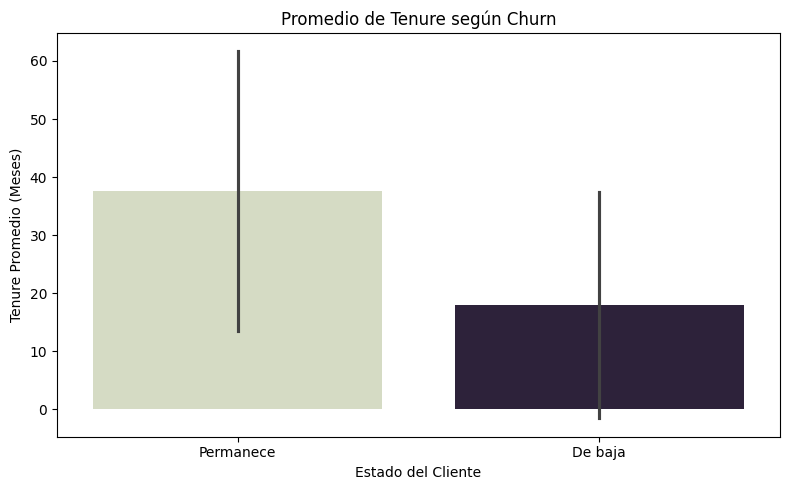

In [47]:
# Grafico Promedio tenure(tiempo de permanencia en meses) con respecto a las bajas

plt.figure(figsize=(8, 5))
sns.barplot(
    data=telecomXdata,
    x='churn',
    y='tenure',
    hue='churn',
    palette=sns.cubehelix_palette(start=.5, rot=-.75, n_colors=2),
    errorbar='sd',
    legend=False
)

# Cambiar las etiquetas del eje X
plt.xticks(ticks=[0, 1], labels=['Permanece', 'De baja'])

plt.title('Promedio de Tenure según Churn')
plt.xlabel('Estado del Cliente')
plt.ylabel('Tenure Promedio (Meses)')

plt.tight_layout()
plt.show()

- Los clientes que se quedan (churn = 0) tienen en promedio 20 meses más de permanencia que los que se van.

- La mediana de los que se quedan es 38 meses, frente a solo 10 meses en los que se dan de baja.

- Esto muestra una relación clara entre bajo tenure y mayor probabilidad de churn.


Al agrupar tenure por churn, se observa que los clientes que permanecen tienen una permanencia promedio de aproximadamente 38 meses, mientras que los que se dan de baja apenas alcanzan los 18 meses. Esto sugiere que los clientes con menor tiempo en la compañía tienden a desertar con mayor frecuencia y lo que sugiere que la evasión ocurre con mayor frecuencia en los primeros meses del servicio.

In [48]:
# Analisis de cargos mensuales por bajas

charges_monthly_grouped = telecomXdata.groupby('churn')['charges_monthly'].describe()
charges_monthly_grouped

,count,mean,std,min,25%,50%,75%,max
churn,,,,,,,,
0,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
1,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


Clientes que permanecen (churn = 0)

- Tienen una media de cargos mensuales de aproximadamente $61.27.

- Sus cargos están más dispersos (mayor desviación estándar: $31.09).

- El 50% de ellos paga menos de $64.43.



Clientes que se dan de baja (churn = 1)

- Tienen una media más alta: $74.44.

- Sus cargos están más concentrados (desviación estándar: $24.66).

- El 50% de ellos paga más de $79.65, lo que es considerablemente mayor.

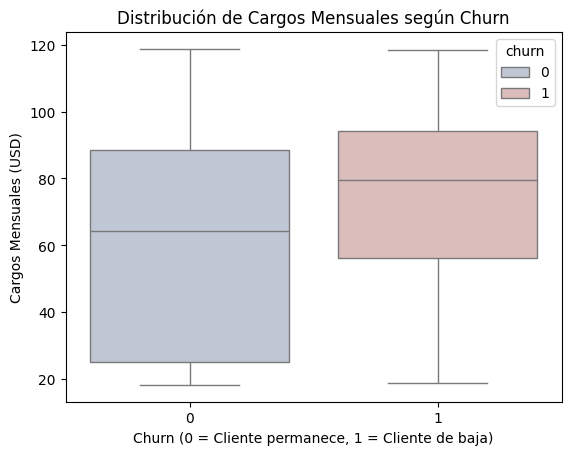

In [49]:
# Boxplot: cargos mensuales según churn
sns.boxplot(data=telecomXdata, x='churn', y='charges_monthly', hue='churn',
            palette=sns.color_palette("vlag", n_colors=2))

# Etiquetas y títulos
plt.title('Distribución de Cargos Mensuales según Churn')
plt.xlabel('Churn (0 = Cliente permanece, 1 = Cliente de baja)')
plt.ylabel('Cargos Mensuales (USD)')

plt.show()

Los clientes que se dan de baja tienden a tener cargos mensuales más altos. Esto sugiere que el precio puede ser un factor determinante en la evasión.


Los clientes que pagan más al mes tienden a darse de baja más que los que pagan menos. Esto podría indicar que los clientes con cargos altos perciben que el servicio no vale lo que cuesta, o que son clientes de planes más costosos pero menos satisfechos.

#📄Informe final

# INTRODUCCION


En este análisis se aborda el problema de la evasión de clientes en una empresa de telecomunicaciones. El objetivo principal es identificar los factores que influyen en la decisión de los usuarios de cancelar el servicio, utilizando técnicas de análisis de datos. Comprender estos factores permitirá a la empresa anticiparse a posibles cancelaciones y diseñar estrategias efectivas para mejorar la retención de clientes.

Cabe aclarar que los pasos de limpieza y tratamiento de datos fueron realizados y explicados al inicio del cuaderno, por lo que en esta sección no se volverán a presentar, enfocándonos directamente en el análisis exploratorio de las variables más relevantes.

## Análisis de Variables Categóricas y Numéricas

Para el análisis anterior se utilizaron variables tanto categóricas como numéricas. Las variables categóricas consideradas inicialmente fueron:

- paymentmethod

- contract

- internetservice

- multiplelines

- gender

Sin embargo, tras una revisión inicial, se descartaron paymentmethod, gender y multiplelines, ya que no mostraron diferencias significativas en los patrones de evasión. En el caso específico de multiplelines, aunque hay una ligera tendencia a que los clientes con múltiples líneas se den de baja con mayor frecuencia, esta diferencia no es tan marcada como en otras variables.
Por esta razón, el análisis se centró en dos variables clave: contract e internetservice, ya que ambas presentaron variaciones claras en la tasa de cancelación y pueden aportar información relevante para orientar estrategias de retención.

### Tipo de servicio de Internet

Según los resultados obtenidos, se concluye lo siguiente:

Clientes con fibra óptica:
Tienen una tasa de evasión muy alta (41.89%), similar a la de los clientes con contrato mensual. Esto puede indicar que, aunque la tecnología ofrecida es mejor, hay factores como el precio, problemas técnicos o la calidad del soporte que generan insatisfacción.

Clientes con DSL:
Presentan una tasa de evasión significativamente menor (18.96%). Es posible que estos clientes tengan expectativas más bajas o estén satisfechos con un servicio más económico.

Clientes sin servicio de Internet:
Tienen la menor tasa de evasión (7.40%). Este grupo podría estar compuesto por personas mayores o con bajo uso de tecnología, como quienes solo utilizan telefonía fija. También es probable que tengan menos razones para cancelar el servicio, al utilizarlo con menor frecuencia.

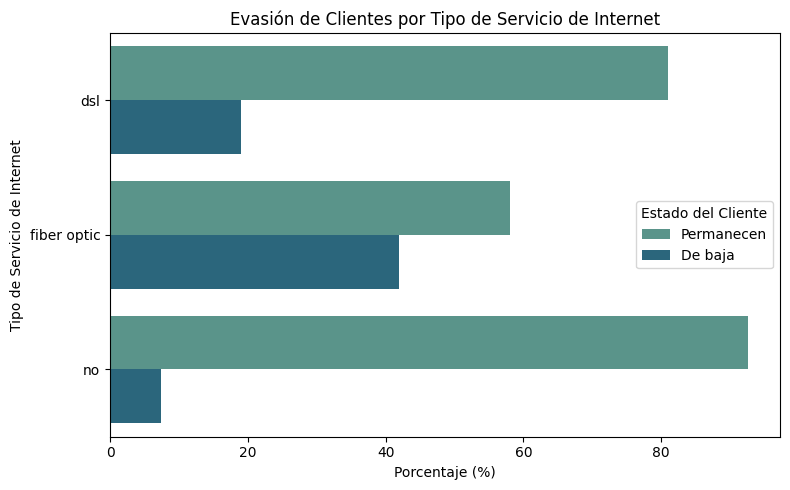

In [52]:
# Grafica por tipo de servicio de internet

# Reformatear los datos
df_plot = table_internetservice_percent.reset_index().melt(
    id_vars='internetservice', var_name='Estado', value_name='Porcentaje'
)

# Reemplazar valores para mostrar etiquetas legibles
df_plot['Estado'] = df_plot['Estado'].map({0: 'Permanecen', 1: 'De baja', 'No': 'Permanecen', 'Yes': 'De baja'})

# Paleta de colores
colores = sns.color_palette("crest", n_colors=2)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot,
            y='internetservice',
            x='Porcentaje',
            hue='Estado',
            palette=colores)

# Títulos
plt.title('Evasión de Clientes por Tipo de Servicio de Internet')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Tipo de Servicio de Internet')

# Leyenda (sin pasar labels manualmente)
plt.legend(title='Estado del Cliente')

plt.tight_layout()
plt.show()

### Tipo de contrato
Según los resultados observados:

- Clientes con contrato mensual:
Muestran una alta tasa de evasión (42.71%), lo cual sugiere que la flexibilidad de este tipo de contrato los hace más propensos a cancelar.

- Clientes con contrato de un año o dos años:
Tienen tasas de cancelación considerablemente más bajas, lo que indica que los compromisos a largo plazo contribuyen a la retención del cliente.

Tendencia clara:
A mayor duración del contrato, menor es la tasa de evasión. Esto respalda la idea de que fomentar contratos más largos podría reducir significativamente la pérdida de clientes.

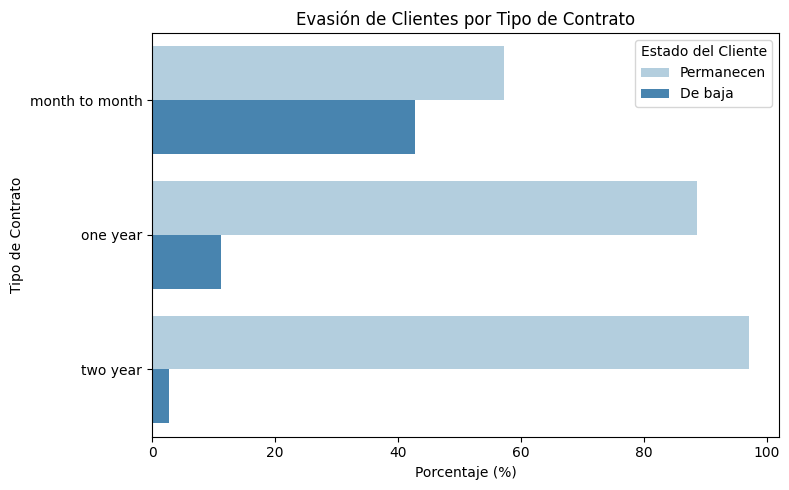

In [53]:
# Grafica por tipo de contrato

# Reformatear los datos
df_contract = table_contract_percent.reset_index().melt(
    id_vars='contract', var_name='Estado', value_name='Porcentaje'
)

# Reemplazar valores para mostrar etiquetas legibles
df_contract['Estado'] = df_contract['Estado'].map({0: 'Permanecen', 1: 'De baja', 'No': 'Permanecen', 'Yes': 'De baja'})

# Paleta de colores
colores = sns.color_palette("Blues", n_colors=2)

# Gráfico
plt.figure(figsize=(8, 5))
sns.barplot(data=df_contract,
            y='contract',
            x='Porcentaje',
            hue='Estado',
            palette=colores)

# Títulos
plt.title('Evasión de Clientes por Tipo de Contrato')
plt.xlabel('Porcentaje (%)')
plt.ylabel('Tipo de Contrato')

# Leyenda
plt.legend(title='Estado del Cliente')

plt.tight_layout()
plt.show()

# Análisis de Variables Numéricas

Para el análisis numérico, se seleccionaron aquellas variables que podrían aportar información relevante en el contexto del estudio sobre la evasión de clientes. Las variables elegidas fueron:

- seniorcitizen: indica si el cliente es una persona mayor.

- tenure: tiempo (en meses) que el cliente ha estado con la empresa.

- charges_monthly: valor mensual que paga el cliente.

- dependents: indica si el cliente tiene personas a su cargo.

### Tipo de ciudadano (seniorcitizen)

Se clasificó a los clientes en dos grupos: jóvenes (menores de 65 años) y mayores (65 años o más). Esta distinción permite analizar diferencias en la retención del servicio.

Los clientes mayores presentan una tasa de cancelación más alta (41.7%) frente a los jóvenes (23.6%).
Esto podría deberse a una menor familiaridad con los servicios digitales, menor uso de internet o mayor sensibilidad al precio.

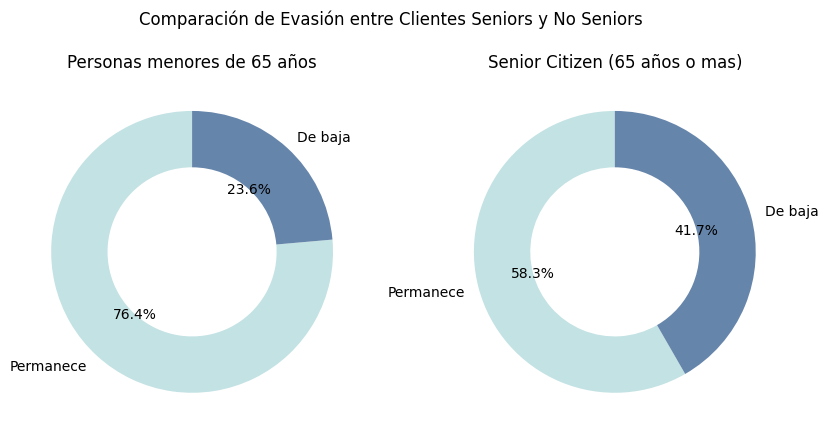

In [54]:
# Grafica analisis Para ciudadanos seniors y no seniors

labels = ['Permanece', 'De baja']
group_0 = [76.39, 23.61]  # No Senior
group_1 = [58.32, 41.68]  # Senior

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico 1: No Senior
ax[0].pie(group_0, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("ch:start=.2,rot=-.3",n_colors=3), wedgeprops=dict(width=0.4))
ax[0].set_title('Personas menores de 65 años')

# Gráfico 2: Senior
ax[1].pie(group_1, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("ch:start=.2,rot=-.3",n_colors=3), wedgeprops=dict(width=0.4))
ax[1].set_title('Senior Citizen (65 años o mas)')

plt.suptitle('Comparación de Evasión entre Clientes Seniors y No Seniors')
plt.show()

### Personas a cargo (dependents)

Los clientes con personas a cargo tienen una tasa de abandono más baja (15.45%).

Por el contrario, los que no tienen dependientes muestran una tasa de evasión mayor (31.28%).

Esto sugiere que los clientes con responsabilidades familiares tienden a ser más estables y valoran más la continuidad del servicio.

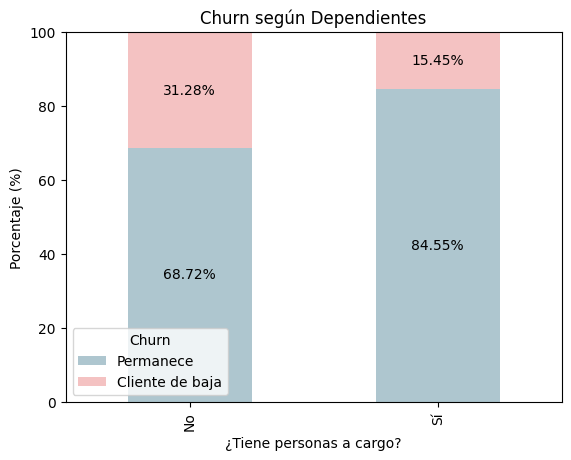

In [56]:
# Grafica personas a cargo
table_dependents_percent.plot(kind='bar', stacked=True, color=['#aec6cf', '#f4c2c2'])

# Etiquetas
plt.title('Churn según Dependientes')
plt.xlabel('¿Tiene personas a cargo?')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Churn', labels=['Permanece', 'Cliente de baja'])

# Mostrar porcentajes sobre las barras
for idx, row in table_dependents_percent.iterrows():
    plt.text(idx, row[0]/2, f"{row[0]}%", ha='center', va='center', color='black')
    plt.text(idx, row[0] + row[1]/2, f"{row[1]}%", ha='center', va='center', color='black')

plt.xticks([0, 1], ['No', 'Sí'])  # Opcional: reemplaza 0 y 1
plt.ylim(0, 100)
plt.show()

### Tiempo de permanencia (tenure)

Los clientes que permanecen tienen en promedio 20 meses más de permanencia que los que se dan de baja.

La mediana de permanencia para los que se quedan es de 38 meses, mientras que en los que se van es de apenas 10 meses.

Al agrupar los datos por churn, se observa una permanencia promedio de 38 meses para los que permanecen y 18 meses para los que se dan de baja.

Esto muestra que la evasión ocurre con mayor frecuencia en los primeros meses del servicio, por lo que enfocar estrategias de fidelización en ese periodo podría ser clave.




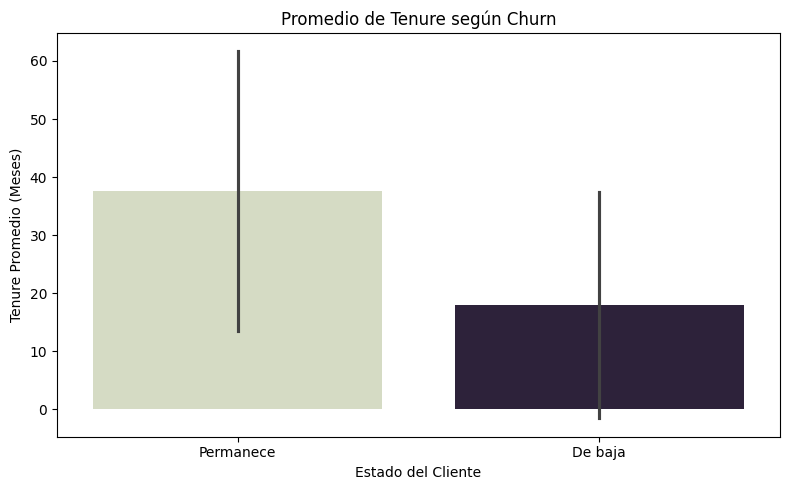

In [57]:
# Grafico Promedio tenure(tiempo de permanencia en meses) con respecto a las bajas

plt.figure(figsize=(8, 5))
sns.barplot(
    data=telecomXdata,
    x='churn',
    y='tenure',
    hue='churn',
    palette=sns.cubehelix_palette(start=.5, rot=-.75, n_colors=2),
    errorbar='sd',
    legend=False
)

# Cambiar las etiquetas del eje X
plt.xticks(ticks=[0, 1], labels=['Permanece', 'De baja'])

plt.title('Promedio de Tenure según Churn')
plt.xlabel('Estado del Cliente')
plt.ylabel('Tenure Promedio (Meses)')

plt.tight_layout()
plt.show()

### Charge monthly (Cargo mensual)


### Clientes que permanecen (churn = 0):

- Media de cargos mensuales: $61.27

- Mayor dispersión en los valores (desviación estándar: $31.09)

- El 50% paga menos de $64.43

### Clientes que se dan de baja (churn = 1):

- Media de cargos mensuales: $74.44

- Menor dispersión (desviación estándar: $24.66)

- El 50% paga más de $79.65

Esto sugiere que los clientes que pagan montos más altos tienden a cancelar el servicio con más frecuencia, posiblemente por una percepción negativa en la relación costo-beneficio.

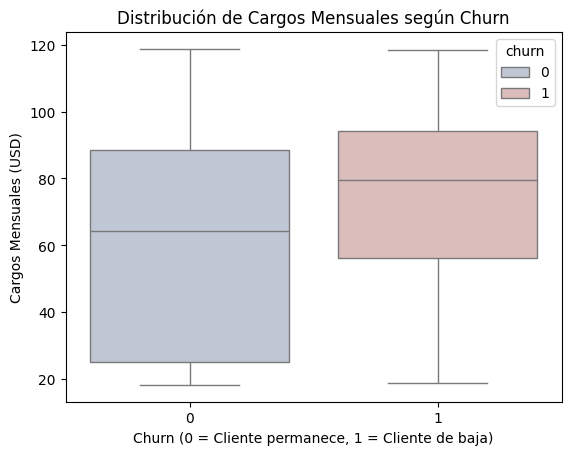

In [58]:
# Boxplot: cargos mensuales según churn
sns.boxplot(data=telecomXdata, x='churn', y='charges_monthly', hue='churn',
            palette=sns.color_palette("vlag", n_colors=2))

# Etiquetas y títulos
plt.title('Distribución de Cargos Mensuales según Churn')
plt.xlabel('Churn (0 = Cliente permanece, 1 = Cliente de baja)')
plt.ylabel('Cargos Mensuales (USD)')

plt.show()

# Conclusiones y recomendaciones:

El análisis revela que la evasión de clientes en la empresa está fuertemente influenciada por factores contractuales, económicos y demográficos. Las tasas de cancelación son significativamente más altas entre quienes tienen contratos mensuales, servicios de fibra óptica, son personas mayores, no tienen dependientes, llevan poco tiempo con la empresa o pagan montos mensuales elevados. Estos patrones sugieren que tanto la percepción del valor del servicio como la estabilidad del cliente influyen en su decisión de mantenerse o abandonar.

### Recomendaciones estrategicas:

- Fomentar contratos a largo plazo:
Promover activamente planes de uno o dos años con beneficios atractivos (descuentos, servicios adicionales) puede ayudar a reducir la evasión significativamente.

- Revisar y mejorar el servicio de fibra óptica:
Dado que los usuarios de fibra presentan la tasa más alta de cancelación, es importante investigar y mejorar aspectos como la calidad del servicio, soporte técnico y precios asociados.

- Estrategias específicas para adultos mayores:
Ofrecer asistencia personalizada, planes simplificados o canales de atención más accesibles puede mejorar la retención de este grupo.

- Atención temprana a nuevos clientes:
Enfocar las estrategias de fidelización durante los primeros meses del servicio, cuando ocurre la mayoría de cancelaciones, puede mejorar la permanencia.

- Ofrecer opciones escalables en planes de alto costo:
Evaluar si los clientes con cargos elevados están recibiendo un servicio proporcional a lo que pagan. En caso contrario, ajustar precios o agregar valor percibido puede reducir la deserción.

- Fortalecer la relación con clientes con dependientes:
Este grupo ya muestra mayor lealtad; pueden ser aliados clave si se les ofrece reconocimiento, beneficios familiares o estabilidad en tarifas.